# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

* SGD (mini-batch)
        在單步更新與全局更新的折衷辦法，通常搭配 momentum 穩定收斂方向與結果。
        收斂速度較慢。
        
* RMSprop
        學習率的調整是根據過去梯度的狀況調整，收斂速度快又不易會出現 learning rate 快速下降的狀況。
        
* Adam
        同樣是可以根據過去的梯度自行調整 learning rate，但校正方式考量一、二階矩陣，使其更加平穩。

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_unit=10, num=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n in enumerate(num):
        if i == 0:
            x = keras.layers.Dense(units=n, activation='relu', name = 'hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n, activation='relu', name = 'hidden_layer'+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_unit, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])  
    
    return model

In [6]:
def build_mlp(input_shape, output_units=10, num=[512,256,128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n in enumerate(num):
        if i == 0 :
            x = keras.layers.Dense(units=n, activation='relu', name ='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n, activation='relu', name='hidden_layer'+str(i+1))(x)
            
    output = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output] )
    return model

In [7]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
epochs = 50
batch_size = 256
MOMENTUM = 0.95

### SGD

In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for i, lr in enumerate(LEARNING_RATE):

    keras.backend.clear_session()

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    
    optimizer = keras.optimizers.SGD(lr = lr, momentum=MOMENTUM)
    print("Experiment with lr = %.6f & Optimizer = SGD" % (lr))
    exp_name_tag = "exp-momentum-%s-optimizer-SGD" % str(lr)

        
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=epochs, batch_size=batch_size,
              validation_data = (x_test, y_test),
              shuffle = True)

    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    val_acc = model.history.history['val_acc']



    results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': val_loss,
                         'train-acc': train_acc,
                         'valid-acc': val_acc}


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Experiment with lr = 0.100000 & Optimizer = SGD
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.8684 - acc: 0.3274 - val_loss: 1.7173 - val_acc: 0.3816
Epoch 2/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.6581 - acc: 0.4064 - val_loss: 1.6438 - val_acc: 0.4121
Epoch 3/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.5739 - acc: 0.4361 - val_loss: 1.5443 - val_acc: 0.4513
Epoch 4/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5173 - acc: 0.4583 - val_loss: 1.5016 - val_acc: 0.4602
Epoch 5/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.4890 - acc: 0.4664 - val_loss: 1.4966 - val_acc: 0.4693
Epoch 6/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4543 - acc: 0.4833 - val_loss: 1.4397 - val_acc: 0.4868
Epoch 7/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4047 - acc: 0.4993 - val_loss: 1.5071 - val_acc

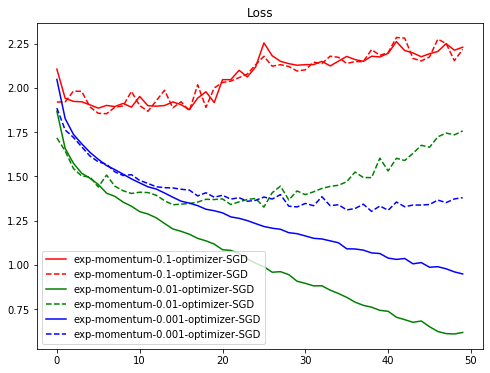

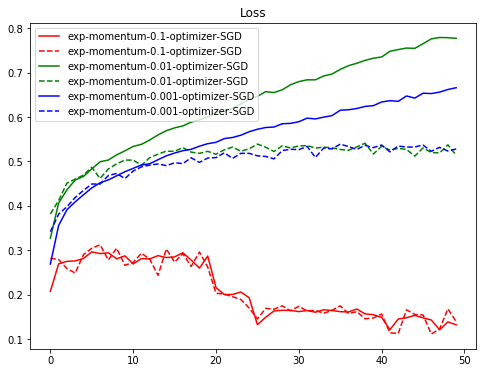

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    
plt.title('Loss')
plt.legend()
plt.show()

### RMSprop

In [10]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for i, lr in enumerate(LEARNING_RATE):

    keras.backend.clear_session()

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    
    optimizer = keras.optimizers.RMSprop(lr = lr)
    print("Experiment with lr = %.6f & Optimizer = RMSprop" % (lr))
    exp_name_tag = "exp-momentum-%s-optimizer-RMSprop" % str(lr)

        
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=epochs, batch_size=batch_size,
              validation_data = (x_test, y_test),
              shuffle = True)

    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    val_acc = model.history.history['val_acc']



    results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': val_loss,
                         'train-acc': train_acc,
                         'valid-acc': val_acc}


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Experiment with lr = 0.100000 & Optimizer = RMSprop
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 90us/step - loss: 14.4442 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 4s 84us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 4s 85us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 85us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 85us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

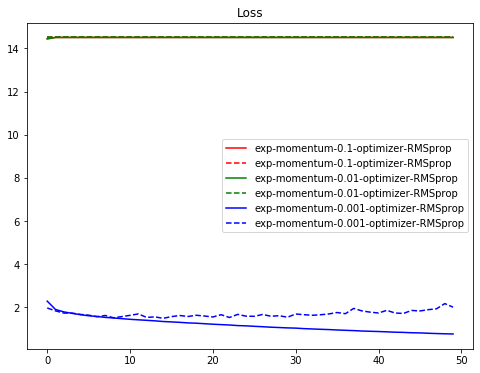

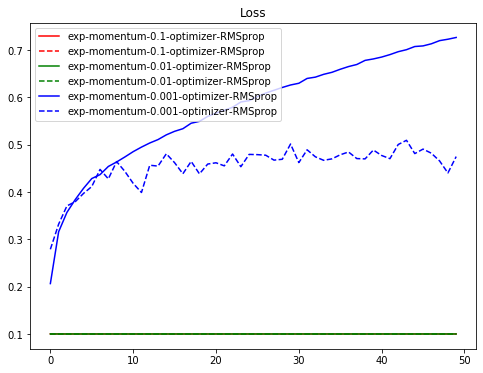

In [11]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    
plt.title('Loss')
plt.legend()
plt.show()

### Adagrad

In [12]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for i, lr in enumerate(LEARNING_RATE):

    keras.backend.clear_session()

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    
    optimizer = keras.optimizers.Adagrad(lr = lr)
    print("Experiment with lr = %.6f & Optimizer = Adagrad" % (lr))
    exp_name_tag = "exp-momentum-%s-optimizer-Adagrad" % str(lr)

        
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=epochs, batch_size=batch_size,
              validation_data = (x_test, y_test),
              shuffle = True)

    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    val_acc = model.history.history['val_acc']



    results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': val_loss,
                         'train-acc': train_acc,
                         'valid-acc': val_acc}


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Experiment with lr = 0.100000 & Optimizer = Adagrad
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 87us/step - loss: 14.4404 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 4s 81us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 4s 80us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 81us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 82us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 82us/step - loss: 14.5060 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 81us/step - loss: 14.5027 - acc: 0.0999 - val_loss: 14.

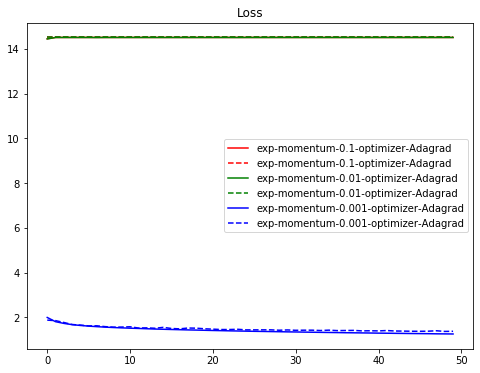

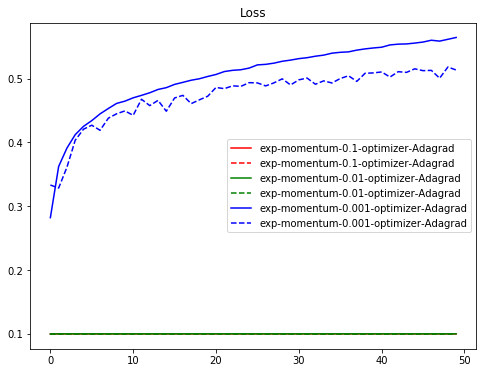

In [13]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    
plt.title('Loss')
plt.legend()
plt.show()

### Adam

In [14]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for i, lr in enumerate(LEARNING_RATE):

    keras.backend.clear_session()

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    
    optimizer = keras.optimizers.Adam(lr = lr)
    print("Experiment with lr = %.6f & Optimizer = Adam" % (lr))
    exp_name_tag = "exp-momentum-%s-optimizer-Adam" % str(lr)

        
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=epochs, batch_size=batch_size,
              validation_data = (x_test, y_test),
              shuffle = True)

    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    val_acc = model.history.history['val_acc']



    results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': val_loss,
                         'train-acc': train_acc,
                         'valid-acc': val_acc}


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Experiment with lr = 0.100000 & Optimizer = Adam
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.4402 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 95us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14

50000/50000 [==============================] - 32s 637us/step - loss: 1.9383 - acc: 0.3048 - val_loss: 1.7686 - val_acc: 0.3632
Epoch 2/50
50000/50000 [==============================] - 34s 674us/step - loss: 1.7048 - acc: 0.3915 - val_loss: 1.6637 - val_acc: 0.4061
Epoch 3/50
50000/50000 [==============================] - 31s 625us/step - loss: 1.6075 - acc: 0.4246 - val_loss: 1.5718 - val_acc: 0.4438
Epoch 4/50
50000/50000 [==============================] - 31s 620us/step - loss: 1.5394 - acc: 0.4510 - val_loss: 1.5095 - val_acc: 0.4656
Epoch 5/50
50000/50000 [==============================] - 31s 620us/step - loss: 1.4849 - acc: 0.4719 - val_loss: 1.5548 - val_acc: 0.4445
Epoch 6/50
50000/50000 [==============================] - 31s 620us/step - loss: 1.4544 - acc: 0.4826 - val_loss: 1.4556 - val_acc: 0.4845
Epoch 7/50
50000/50000 [==============================] - 31s 621us/step - loss: 1.4267 - acc: 0.4913 - val_loss: 1.4760 - val_acc: 0.4755
Epoch 8/50
50000/50000 [==============

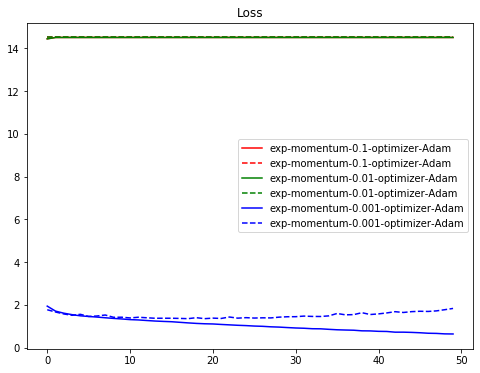

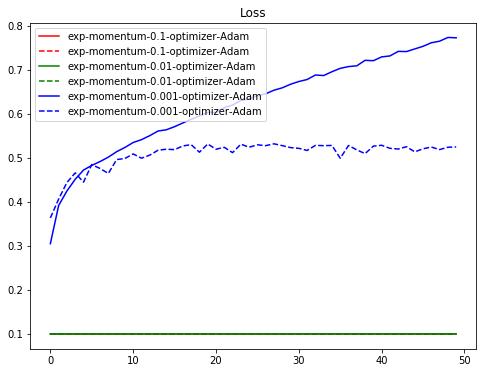

In [15]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    
plt.title('Loss')
plt.legend()
plt.show()